# Asteroid fitting notebook

In [6]:
import glob
import numpy
import pandas
import splat
import splat.plot as splot
%matplotlib inline

# should be later than 2022.07.05
print('SPLAT version = {}'.format(splat.VERSION))

# change this to where your asteroid templates are stored
asteroid_templates_path = 'D:/PythonCodes/JupyterWorkspace/splat_projects/Demeo_et_al_2009_Folder/csv'
asteroid_examples_path = 'D:/PythonCodes/JupyterWorkspace/splat_projects/SpeX_asteroid_spectra'
      

SPLAT version = 2022.07.05


In [7]:
# read in asteroid standards (csv files)
files = glob.glob(asteroid_templates_path+'/*.csv')
asteroid_templates = {}
for f in files:
    spt = (f.split('_')[-1]).replace('.csv','')
    dp = pandas.read_csv(f,delimiter='\s+')
    sp = splat.Spectrum(wave=dp['Wave'],flux=dp['Flux'],name=spt)
    asteroid_templates[spt]=sp
asteroid_templates

KeyError: 'Wave'

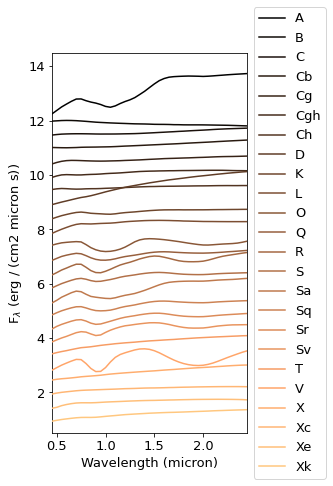

[<Figure size 360x720 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the asteroid templates
kys= list(asteroid_templates.keys())
kys.sort()
astlist = [asteroid_templates[k] for k in kys]
splot.plotSpectrum(astlist,stack=0.5,legend_location='outside',figsize=[5,10],colormap='copper',yrange=[0.5,0.5*len(astlist)+2.5],xlabel='Reflectance')


In [ ]:
# read in test file(s)
files = glob.glob(asteroid_examples_path+'*.fits')
spectra = []
for f in files:
    spectra.append(splat.Spectrum(file=f))


In [ ]:
# classify a test file
for sp in spectra:
    splat.classifyByTemplate(sp,asteroid_templates,plot=True,fit_range=[0.8,2.3],telluric=True)

In [ ]:
x = [3,4,56]
x[:5]